In [3]:
import os

In [4]:
os.getcwd()

'/Users/abishekkumaryadav/DataScience/NLP/Hate_speech_project_End_to_end/research'

In [5]:
os.chdir("../")

In [6]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
imbalance=pd.read_csv('imbalanced_data.csv')
imbalance.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
imbalance['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [13]:
imbalance['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

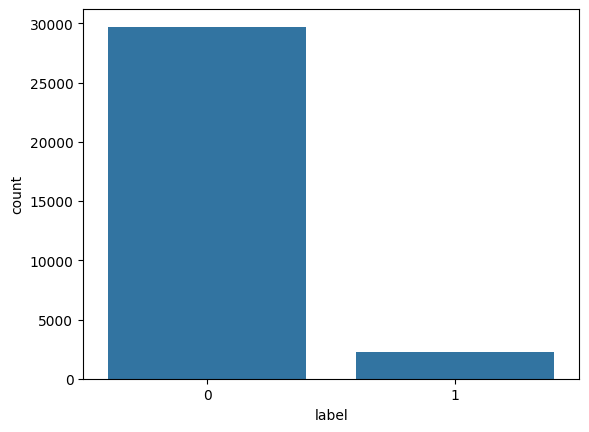

In [16]:
sns.countplot(x='label', data=imbalance)

In [17]:
# O -> NOhate
# 1 -> Hate

In [18]:
imbalance.shape

(31962, 3)

In [20]:
imbalance.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [22]:
imbalance.duplicated().sum()

0

In [24]:
imbalance.drop('id',axis=1,  inplace=True)

In [25]:
imbalance.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Loading another data called raw_data

In [143]:
raw_data=pd.read_csv("raw_data.csv")

In [144]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [145]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [146]:
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [147]:
raw_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [148]:
# Drop the unnessary columns from dataset which are not required.
raw_data.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

In [149]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [150]:
raw_data['tweet'][0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [151]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

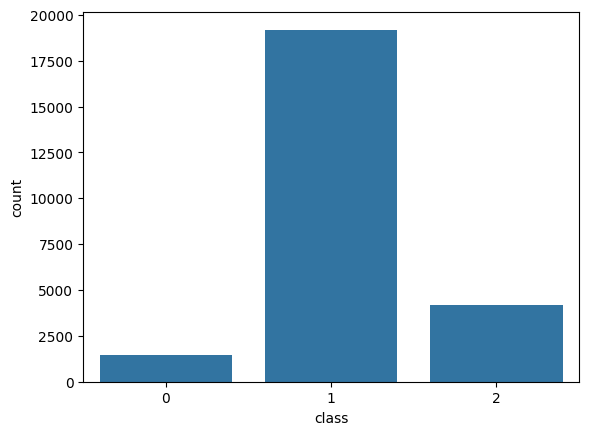

In [152]:
sns.countplot(x='class', data=raw_data)

### Class 0 - Hate
### Class 1 - Abusive
### Class 2 - No hate 
#### Lets make hate and Abusive class as hate class 

In [153]:
raw_data['class'].replace({0:1}, inplace=True)

In [154]:
raw_data['class'].value_counts()

class
1    20620
2     4163
Name: count, dtype: int64

In [155]:
raw_data[raw_data['class']==1]

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
...,...,...
24776,1,you're all niggers
24777,1,you're such a retard i hope you get type 2 dia...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780,1,young buck wanna eat!!.. dat nigguh like I ain...


<Axes: xlabel='class', ylabel='count'>

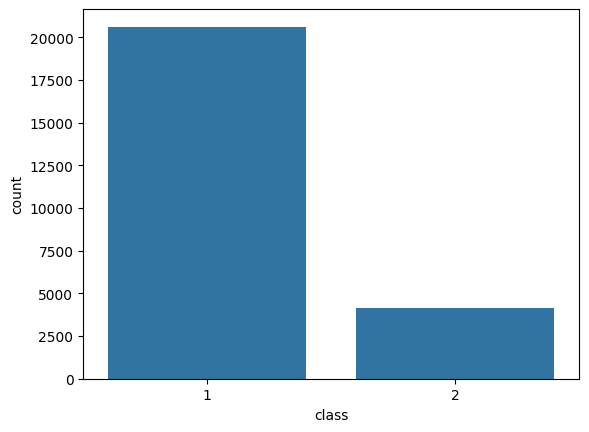

In [156]:
sns.countplot(x='class', data=raw_data)

In [157]:
# Lets change the name of the class to label so that help to concate.
raw_data.rename(columns={'class':'label'}, inplace=True)

In [158]:
raw_data['label'].value_counts()

label
1    20620
2     4163
Name: count, dtype: int64

In [159]:
raw_data.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [162]:
df1=raw_data[raw_data['label']==1]

In [163]:
conc_fet=[df1, imbalance]
df=pd.concat(conc_fet)

In [164]:
df.head()

,label,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


<Axes: xlabel='label', ylabel='count'>

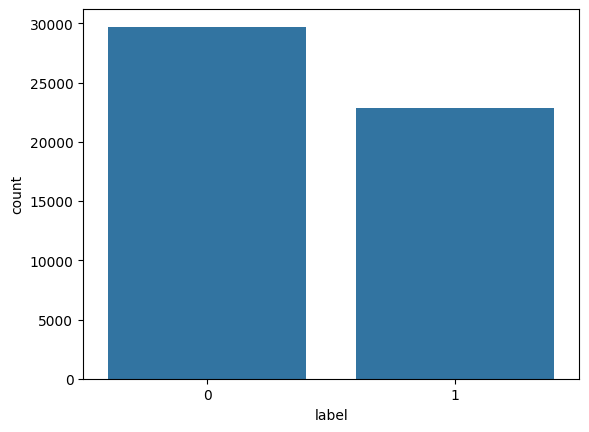

In [165]:
sns.countplot(x='label', data=df)

### Suppose to balance data number of nohate speech is 30000 and hate speech is 24000.

In [166]:
df.shape

(52582, 2)

In [168]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abishekkumaryadav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [176]:
from nltk.corpus import stopwords
import re
import string

In [172]:
# Lets apply stemminng and stopwords
stemmer=nltk.SnowballStemmer("english")
stopwords=set(stopwords.words('english'))

In [182]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [183]:
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopwords]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [184]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [190]:
df['tweet'][0]

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run

### Spliting dependent and independent data from dataset

In [191]:
x=df['tweet']
y=df['label'] 

In [192]:
x

1         rt  boy dats coldtyga dwn bad for cuffin dat ...
2         rt urkindofbrand dawg rt  you ever fuck a bit...
3         rt cganderson vivabased she look like a trann...
4         rt shenikaroberts the shit you hear about me ...
5        tmadisonx the shit just blows meclaim you so f...
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961    thank you user for you follow   thank you user...
Name: tweet, Length: 52582, dtype: object

In [193]:
y

1        1
2        1
3        1
4        1
5        1
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 52582, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
## Spliting dependent and independent in train and test data
x_train,x_test ,y_train,y_test=train_test_split(x, y, test_size=0.25 , random_state=42) 
x_train.shape,x_test.shape ,y_train.shape,y_test.shape

((39436,), (13146,), (39436,), (13146,))

# Feature Engineering

max_words=50000: This sets the maximum number of words to keep in the vocabulary.
Only the most frequent max_words words will be kept in the vocabulary,
and less frequent words will be ignored.
"""

In [214]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences

In [220]:
# First we are converting the text into integer than we pass these intger into wordEmbedding.

max_words=50000
max_len=300
"""
max_words=50000: This sets the maximum number of words to keep in the vocabulary.
Only the most frequent max_words words will be kept in the vocabulary,
and less frequent words will be ignored.
"""

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

"""
It is used to convert a list of texts (sentences or documents) into sequences
of integers. Each word in the text is replaced with its corresponding integer
index from the tokenizer's internal vocabulary.
"""

sequences=tokenizer.texts_to_sequences(x_train)
sequences=pad_sequences(sequences, maxlen=max_len)


In [225]:
sequences[0]

array([   99,     2,     5,    80,    74,    10,   166,   899,    28,
          24,   587,   899,    34, 20126,   899,    40,  4556,  2438,
         108,  1065,    13,  1474, 20127,    99,     2,     5,    80,
          74,    10,   166,   899,    28,    24,   587,   899,    34,
       20126,   899,    40,  4556,  2438,   108,  1065,    13,  1474,
       20127,    99,     2,     5,    80,    74,    10,   166,   899,
          28,    24,   587,   899,    34, 20126,   899,    40,  4556,
        2438,   108,  1065,    13,  1474, 20127,    99,     2,     5,
          80,    74,    10,   166,   899,    28,    24,   587,   899,
          34, 20126,   899,    40,  4556,  2438,   108,  1065,    13,
        1474, 20127,    99,     2,     5,    80,    74,    10,   166,
         899,    28,    24,   587,   899,    34, 20126,   899,    40,
        4556,  2438,   108,  1065,    13,  1474, 20127,    99,     2,
           5,    80,    74,    10,   166,   899,    28,    24,   587,
         899,    34,

In [227]:
# Creating model architecure
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D, LSTM

In [228]:
model=Sequential()
# The Embedding layer is responsible for learning a dense representation of words in your vocalulary.
model.add(Embedding(max_words, 100, input_length=max_len))
# Each word is represented by a vector of real numbers (emdedding) in a high-dimensional space (in this case, 100 dimensions).
# The input length parameter ensures that sequences of consistent length are fed into the network.
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [231]:
history=model.fit(sequences, y_train, epochs=1, batch_size=128)

309/309 [==============================] - 152s 489ms/step - loss: 0.2081 - acc: 0.9186


In [234]:
test_sequence_matrix=tokenizer.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequence_matrix, maxlen=max_len)